In [1]:
import psycopg2

In [2]:
connection = psycopg2.connect("user=postgres", password="123457",
                              host="127.0.0.1", port="5432", database="Analyzing eCommerce Business Performance with SQL")
cur = connection.cursor()

In [3]:
cur.execute("SELECT version();")
record = cur.fetchone()
print("You are connected to - ", record)

You are connected to -  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


In [4]:
cur.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
for table in cur.fetchall(): # cur.fetchall berfungsi untuk menampilkan seluruh tabel pada database
    print(table)

('customers_dataset',)
('geolocation_dataset',)
('order_items_dataset',)
('order_payments_dataset',)
('order_reviews_dataset',)
('orders_dataset',)
('product_dataset',)
('sellers_dataset',)


In [7]:
cur = connection.cursor()
cur.execute("WITH rjc AS (SELECT Year,FLOOR(AVG(Active_customer)) AS average_customer FROM (SELECT EXTRACT(YEAR FROM o.order_purchase_timestamp) AS Year, EXTRACT(MONTH FROM o.order_purchase_timestamp) AS Month,COUNT(DISTINCT cd.customer_id) AS Active_Customer FROM orders_dataset o JOIN customers_dataset cd ON o.customer_id = cd.customer_id GROUP BY 1, 2 ORDER BY 1, 2) tmp GROUP BY 1), jcb AS ( SELECT Year, COUNT(customer_unique_id) AS total_purchases FROM (SELECT cd.customer_unique_id, EXTRACT(YEAR FROM MIN(o.order_purchase_timestamp)) AS Year FROM orders_dataset o JOIN customers_dataset cd ON o.customer_id = cd.customer_id GROUP BY 1 ) tmp GROUP BY 1), jcp AS ( SELECT Year, COUNT(customer_unique_id) AS Total FROM(SELECT EXTRACT(YEAR FROM o.order_purchase_timestamp) AS Year, cd.customer_unique_id, COUNT(o.order_id) AS repeat_order FROM orders_dataset o JOIN customers_dataset cd ON o.customer_id = cd.customer_id GROUP BY 1, 2 HAVING COUNT(o.order_id) > 1 ) tmp GROUP BY 1 ), rjo AS (SELECT Year, AVG(jumlah_order) AS avg_order FROM ( SELECT EXTRACT(YEAR FROM o.order_purchase_timestamp) AS Year, COUNT(o.order_id) AS jumlah_order,cd.customer_unique_id FROM orders_dataset o JOIN customers_dataset cd ON o.customer_id = cd.customer_id GROUP BY 1, 3 ORDER BY 1, 3) tmp GROUP BY 1 ) SELECT rjc.Year AS Year, rjc.average_customer AS Monthly_Active_User, jcb.total_purchases AS Customer_Baru_Pertahun,jcp.Total AS Total_Repeat_Order_pertahun, rjo.avg_order AS Frekuensi_Order_Pertahun FROM rjc JOIN jcb ON rjc.year = jcb.year JOIN jcp ON jcb.year = jcp.year JOIN rjo ON jcp.year = rjo.year;")


hasil = cur.fetchall()

# Mendapatkan daftar nama kolom dari objek kursor
kolom = [desc[0] for desc in cur.description]

import pandas as pd
df = pd.DataFrame(hasil, columns=kolom)  # Menyertakan daftar nama kolom saat membuat DataFrame
df.head()

,year,monthly_active_user,customer_baru_pertahun,total_repeat_order_pertahun,frekuensi_order_pertahun
0,2016,109,326,3,1.0092024539877301
1,2017,3758,43708,1256,1.03175256788598357468
2,2018,5401,52062,1167,1.02392462416349125102


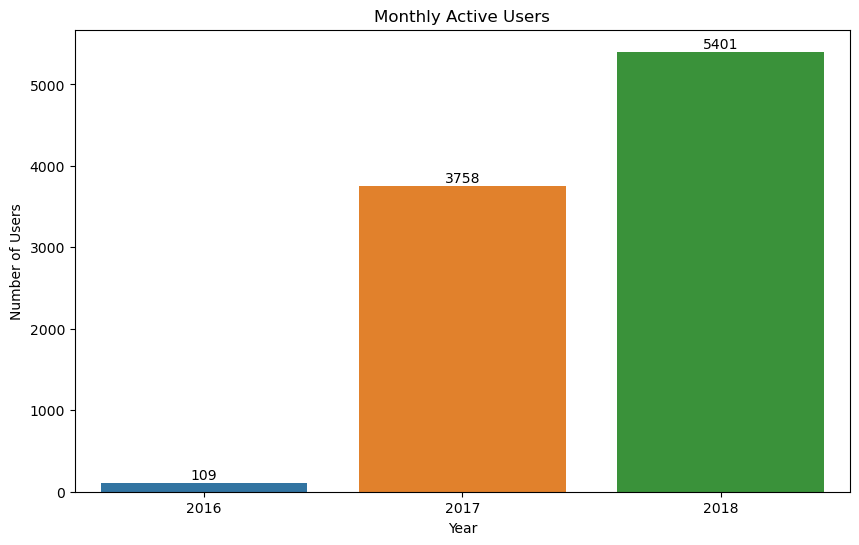

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
years = df['year']
monthly_active_users = df['monthly_active_user']

# Plotting menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=monthly_active_users)
plt.title('Monthly Active Users')
plt.xlabel('Year')
plt.ylabel('Number of Users')

# Menambahkan nilai di atas batang
for i in range(len(years)):
    plt.text(i, monthly_active_users[i], str(monthly_active_users[i]), ha='center', va='bottom')

plt.show()

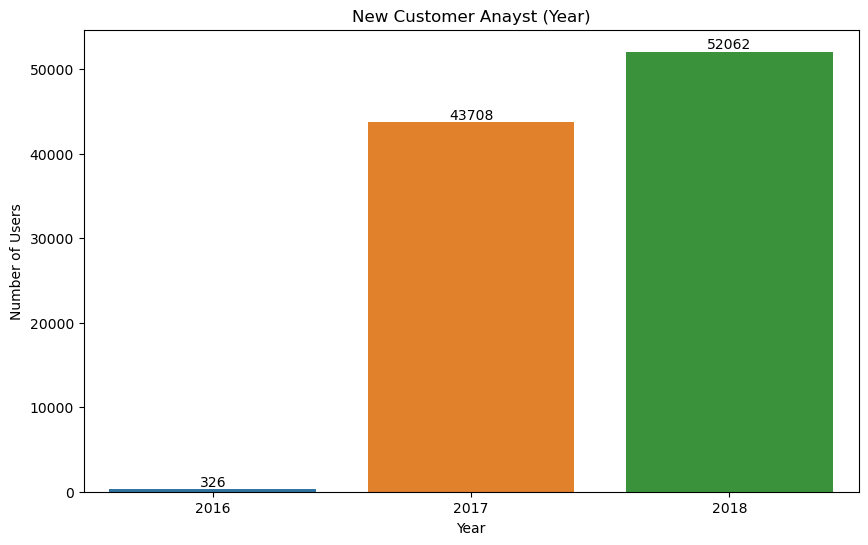

In [9]:
# Data
years = df['year']
customer_baru_pertahun = df['customer_baru_pertahun']

# Plotting menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=customer_baru_pertahun)
plt.title('New Customer Anayst (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Users')

# Menambahkan nilai di atas batang
for i in range(len(years)):
    plt.text(i, customer_baru_pertahun[i], str(customer_baru_pertahun[i]), ha='center', va='bottom')

plt.show()

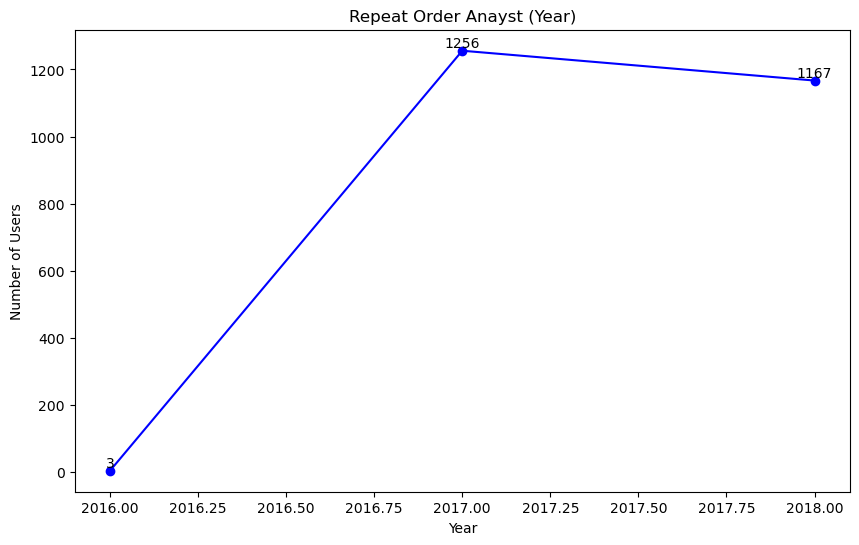

In [10]:
import matplotlib.pyplot as plt

# Data
years = df['year']
total_repeat_order_pertahun = df['total_repeat_order_pertahun']

# Plotting menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(years, total_repeat_order_pertahun, marker='o', linestyle='-', color='blue')

# Menambahkan nilai di atas titik pada garis
for i in range(len(years)):
    plt.text(years[i], total_repeat_order_pertahun[i], str(total_repeat_order_pertahun[i]), ha='center', va='bottom')

plt.title('Repeat Order Anayst (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Users')

plt.show()

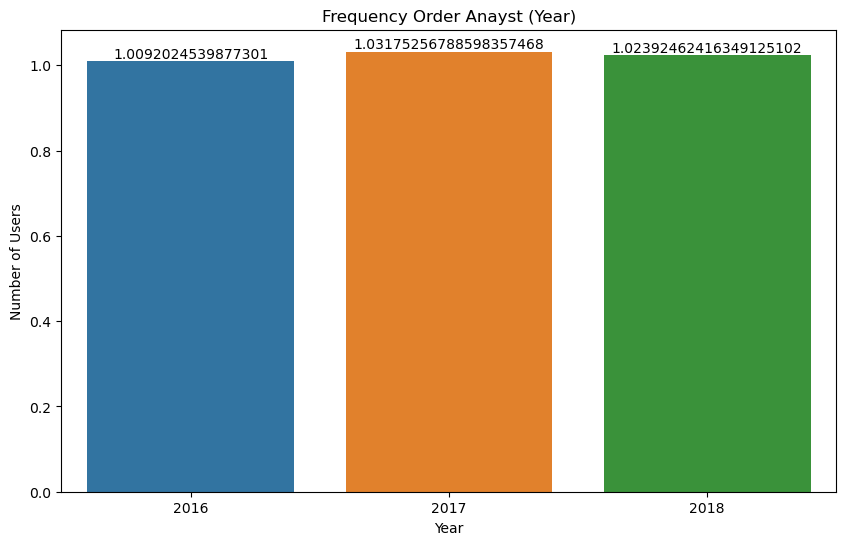

In [11]:
# Data
years = df['year']
frekuensi_order_pertahun = df['frekuensi_order_pertahun']

# Plotting menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=years, y=frekuensi_order_pertahun)
plt.title('Frequency Order Anayst (Year)')
plt.xlabel('Year')
plt.ylabel('Number of Users')

# Menambahkan nilai di atas batang
for i in range(len(years)):
    plt.text(i, frekuensi_order_pertahun[i], str(frekuensi_order_pertahun[i]), ha='center', va='bottom')

plt.show()
